# Task Description

## Requirements

Please use the data in  
Sep/2018 or **Nov/2018**  
and compare with data in  
**Mar/2019**  
for the following platforms in the deployment time period.

**Not sure if we have eliminated the early arrivals in the previous analysis.**

Dwell Time Calculation Method:  
* IF Actual Arrival < Planned Arrival,  Dwell = Dwell_Depart_Calc_Time – Planned Arrival
* IF Actual arrival > Planned Arrival, Dwell = Dwell_Depart_Calc_Time – Dwell_Arrival_Calc_Time

OCP-enhanced dwell management

| Station        | Platform | Deployment         | Year (Quarter) commenced |
|----------------|----------|--------------------|--------------------------|
| Wolli Creek    | 1        | 07:00 to 09:00 hrs | Early 2019               |
| International  | 1        | 07:00 to 09:00 hrs | Early 2019               |
| Domestic       | 1        | 07:00 to 09:00 hrs | Early 2019               |
| Mascot         | 1        | 07:00 to 09:00 hrs | Early 2019               |
| Green Square   | 1        | 07:00 to 09:00 hrs | Early 2019               |
| Chatswood (AM) | 1        | 06:30 to 09:00 hrs | Q2 2019 (15 Apr)         |

## Results

The results are summerized as follows.

**Sep2018 VS. Mar2019**

Num Significant Increase 3  
Num Significant Decrease 2  
Num Not Significant 7  
==========Inc_Platform==========  
['CWD1', 'GQU2', 'MCO2']  
==========Dec_Platform==========  
['MCO1', 'SDT1']  
==========Not_Platform==========  
['CWD4', 'GQU1', 'SDT2', 'SIT1', 'SIT2', 'WCI1', 'WCI2']

**Nov/2018 VS. Mar/2019**

Num Significant Increase 2  
Num Significant Decrease 2  
Num Not Significant 8  
==========Inc_Platform==========  
['CWD1', 'CWD4']  
==========Dec_Platform==========  
['GQU1', 'SIT2']  
==========Not_Platform==========  
['GQU2', 'MCO1', 'MCO2', 'SDT1', 'SDT2', 'SIT1', 'WCI1', 'WCI2']

**Nov/2018 VS. Nov/2019**

Num Significant Increase 1  
Num Significant Decrease 3  
Num Not Significant 8  
==========Inc_Platform==========  
['CWD1']  
==========Dec_Platform==========  
['CWD4', 'SIT1', 'WCI1']  
==========Not_Platform==========  
['GQU1', 'GQU2', 'MCO1', 'MCO2', 'SDT1', 'SDT2', 'SIT2', 'WCI2']

# Initiliazation

## Load Package

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

## Utility Functions

In [10]:
# station_name_union_list = np.intersect1d(
#     data1['actual_arrival_platform'.upper()].unique(),
#     data2['actual_arrival_platform'.upper()].unique())
station_name_union_list = [
    'GQU1', 'GQU2', 'WCI1', 'WCI2', 'SIT1', 'SIT2', 'SDT1', 'SDT2', 'MCO1',
    'MCO2', 'CWD1', 'CWD4'
]


def perform_analysis(data1, data2):

    inc_significant_station = []
    dec_significant_station = []
    not_significant_station = []

    for station_name in np.sort(station_name_union_list):
        print()
        print('Platform Name', station_name)
        data1_by_station = data1.loc[data1.ACTUAL_ARRIVAL_PLATFORM ==
                                     station_name]
        data2_by_station = data2.loc[data2.ACTUAL_ARRIVAL_PLATFORM ==
                                     station_name]

        earl_idx = data1_by_station['tls_actual_arrival_time'.upper(
        )] < data1_by_station['tps_planned_arrival_time'.upper()]
        late_idx = data1_by_station['tls_actual_arrival_time'.upper(
        )] >= data1_by_station['tps_planned_arrival_time'.upper()]

        dwell_time_apr_earl = (
            data1_by_station.loc[earl_idx, 'dwell_depart_calc_time'.upper()] -
            data1_by_station.loc[earl_idx, 'tps_planned_arrival_time'.upper()]
        ).dt.total_seconds()

        dwell_time_apr_late = (
            data1_by_station.loc[late_idx, 'dwell_depart_calc_time'.upper()] -
            data1_by_station.loc[late_idx, 'dwell_arrival_calc_time'.upper()]
        ).dt.total_seconds()

        dwell_sec_apr = pd.concat([dwell_time_apr_earl, dwell_time_apr_late],
                                  axis=0)

        earl_idx = data2_by_station['tls_actual_arrival_time'.upper(
        )] < data2_by_station['tps_planned_arrival_time'.upper()]
        late_idx = data2_by_station['tls_actual_arrival_time'.upper(
        )] >= data2_by_station['tps_planned_arrival_time'.upper()]

        dwell_time_nov_earl = (
            data2_by_station.loc[earl_idx, 'dwell_depart_calc_time'.upper()] -
            data2_by_station.loc[earl_idx, 'tps_planned_arrival_time'.upper()]
        ).dt.total_seconds()
        dwell_time_nov_late = (
            data2_by_station.loc[late_idx, 'dwell_depart_calc_time'.upper()] -
            data2_by_station.loc[late_idx, 'dwell_arrival_calc_time'.upper()]
        ).dt.total_seconds()

        dwell_sec_nov = pd.concat([dwell_time_nov_earl, dwell_time_nov_late],
                                  axis=0)

        dwell_sec_apr = dwell_sec_apr.loc[dwell_sec_apr != 0.0]
        dwell_sec_apr = dwell_sec_apr.loc[~dwell_sec_apr.isnull()]
        dwell_sec_nov = dwell_sec_nov.loc[dwell_sec_nov != 0.0]
        dwell_sec_nov = dwell_sec_nov.loc[~dwell_sec_nov.isnull()]

        max_waiting_sec = 120
        num_sample = 2000
        num_bins = 20
        dwell_sec_apr = dwell_sec_apr.loc[dwell_sec_apr < max_waiting_sec]
        dwell_sec_nov = dwell_sec_nov.loc[dwell_sec_nov < max_waiting_sec]

        random_idx_apr = np.random.permutation(
            dwell_sec_apr.shape[0])[:num_sample]
        random_idx_nov = np.random.permutation(
            dwell_sec_nov.shape[0])[:num_sample]

        h, p = stats.ks_2samp(dwell_sec_apr.values[random_idx_apr],
                                    dwell_sec_nov.values[random_idx_nov])

        print('Dwell time selected by:')
        print('    Max waiting second', max_waiting_sec)
        print('    Sample size', num_sample)
        # print()
        print('=' * 15, 'Statistics'.center(10), '=' * 15)
        print('Apr dwell mean in (sec)',
              dwell_sec_apr.iloc[random_idx_apr].mean())
        print('Nov dwell mean in (sec)',
              dwell_sec_nov.iloc[random_idx_nov].mean())
        print('KS two-sample test pValue', p)
        if p < 0.05:
            if dwell_sec_nov.iloc[random_idx_nov].mean(
            ) > dwell_sec_apr.iloc[random_idx_apr].mean():
                inc_significant_station.append(station_name)
                print('Dwell Time Increase IS Signficiant')
            else:
                dec_significant_station.append(station_name)
                print('Dwell Time Decrease IS Signficiant')
        else:
            not_significant_station.append(station_name)
            if dwell_sec_nov.iloc[random_idx_nov].mean(
            ) > dwell_sec_apr.iloc[random_idx_apr].mean():
                print('Dwell Time Increase NOT Signficiant')
            else:
                print('Dwell Time Decrease NOT Signficiant')

        dwell_sec_apr.iloc[random_idx_apr].hist(bins=num_bins,
                                                density=True,
                                                alpha=0.5)
        dwell_sec_nov.iloc[random_idx_nov].hist(bins=num_bins,
                                                density=True,
                                                alpha=0.5)
        plt.legend(
            [ledgen1 + ' ' + station_name, ledgen2 + ' ' + station_name])
        plt.title(station_name + ', ' + ledgen1 + ' - ' + ledgen2 +
                  'Dwell Time Histogram by Density\n' + 'MeanDiff ' +
                  '{:.2f}'.format(dwell_sec_apr.iloc[random_idx_apr].mean() -
                                  dwell_sec_nov.iloc[random_idx_nov].mean()))
        plt.xlabel('Dwell Time (s)')
        plt.ylabel('Density (%)')
        plt.show()

        dwell_sec_apr_sorted = dwell_sec_apr.iloc[random_idx_apr].sort_values(
        ).reset_index(drop=True)
        dwell_sec_apr_sorted.plot()
        dwell_sec_nov_sorted = dwell_sec_nov.iloc[random_idx_nov].sort_values(
        ).reset_index(drop=True)
        dwell_sec_nov_sorted.plot()
        plt.legend(
            [ledgen1 + ' ' + station_name, ledgen2 + ' ' + station_name])
        plt.title(ledgen1 + ' - ' + ledgen2)
        plt.xlabel('Order')
        plt.ylabel('Dwell Time (s)')
        plt.show()

    print()
    print()
    print('Num Significant Increase', len(inc_significant_station))
    print('Num Significant Decrease', len(dec_significant_station))
    print('Num Not Significant', len(not_significant_station))
    print('=' * 10 + 'Inc_Platform'.center(10) + '=' * 10)
    print(inc_significant_station)
    print('=' * 10 + 'Dec_Platform'.center(10) + '=' * 10)
    print(dec_significant_station)
    print('=' * 10 + 'Not_Platform'.center(10) + '=' * 10)
    print(not_significant_station)
    
def data_preprocessing(data1, data2):
    data1['tps_planned_arrival_time'.upper()] = pd.to_datetime(
        data1['tps_planned_arrival_time'.upper()])
    data1['dwell_arrival_calc_time'.upper()] = pd.to_datetime(
        data1['dwell_arrival_calc_time'.upper()])
    data1['dwell_depart_calc_time'.upper()] = pd.to_datetime(
        data1['dwell_depart_calc_time'.upper()])
    data1['tls_actual_arrival_time'.upper()] = pd.to_datetime(
        data1['tls_actual_arrival_time'.upper()])

    data2['tps_planned_arrival_time'.upper()] = pd.to_datetime(
        data2['tps_planned_arrival_time'.upper()])
    data2['dwell_arrival_calc_time'.upper()] = pd.to_datetime(
        data2['dwell_arrival_calc_time'.upper()])
    data2['dwell_depart_calc_time'.upper()] = pd.to_datetime(
        data2['dwell_depart_calc_time'.upper()])
    data2['tls_actual_arrival_time'.upper()] = pd.to_datetime(
        data2['tls_actual_arrival_time'.upper()])

    data1_up_idx = (data1['tps_planned_arrival_time'.upper()].dt.hour >=
                    7) & (data1['tps_planned_arrival_time'.upper()].dt.hour <= 8)
    data2_up_idx = (data2['tps_planned_arrival_time'.upper()].dt.hour >=
                    7) & (data2['tps_planned_arrival_time'.upper()].dt.hour <= 8)

    data1 = data1.loc[data1_up_idx]
    data2 = data2.loc[data2_up_idx]
    return data1, data2

# ===== Nov2018 VS. Mar2019 ===== #

/data/anjliu/venv_kaggle_nfl/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (88,89) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)



Platform Name CWD1
Dwell time selected by:
    Max waiting second 120
    Sample size 2000
=============== Statistics ===============
Apr dwell mean in (sec) 38.647702407002186
Nov dwell mean in (sec) 43.412393162393165
KS two-sample test pValue 3.2434201990838574e-09
Dwell Time Increase IS Signficiant


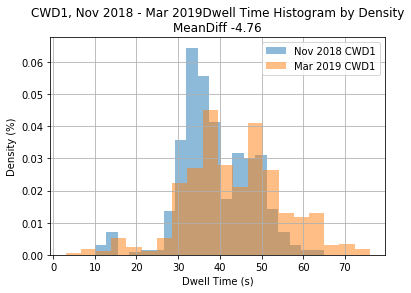

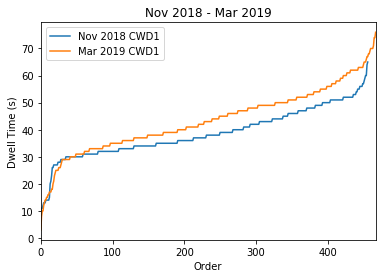


Platform Name CWD4
Dwell time selected by:
    Max waiting second 120
    Sample size 2000
=============== Statistics ===============
Apr dwell mean in (sec) 40.046601941747575
Nov dwell mean in (sec) 42.97773654916512
KS two-sample test pValue 0.00016501156113823967
Dwell Time Increase IS Signficiant


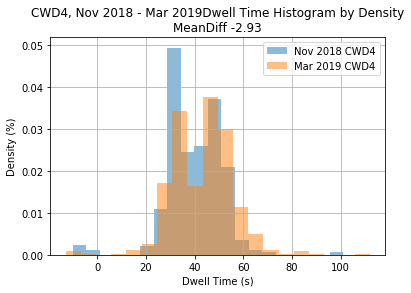

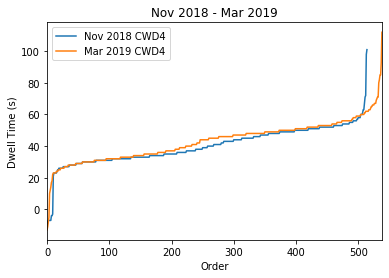


Platform Name GQU1
Dwell time selected by:
    Max waiting second 120
    Sample size 2000
=============== Statistics ===============
Apr dwell mean in (sec) 45.61576354679803
Nov dwell mean in (sec) 38.66847826086956
KS two-sample test pValue 0.013774972518162065
Dwell Time Decrease IS Signficiant


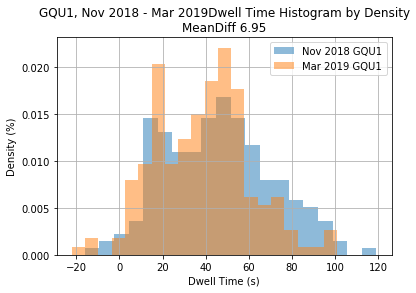

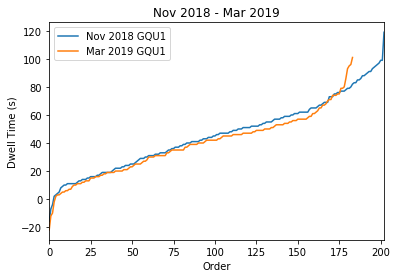


Platform Name GQU2
Dwell time selected by:
    Max waiting second 120
    Sample size 2000
=============== Statistics ===============
Apr dwell mean in (sec) 32.46031746031746
Nov dwell mean in (sec) 33.33673469387755
KS two-sample test pValue 0.40200618641713703
Dwell Time Increase NOT Signficiant


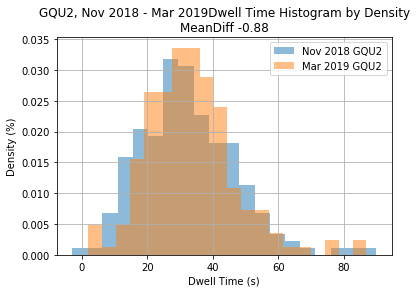

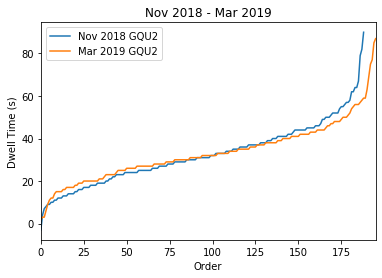


Platform Name MCO1
Dwell time selected by:
    Max waiting second 120
    Sample size 2000
=============== Statistics ===============
Apr dwell mean in (sec) 39.10344827586207
Nov dwell mean in (sec) 34.464864864864865
KS two-sample test pValue 0.08527494073933073
Dwell Time Decrease NOT Signficiant


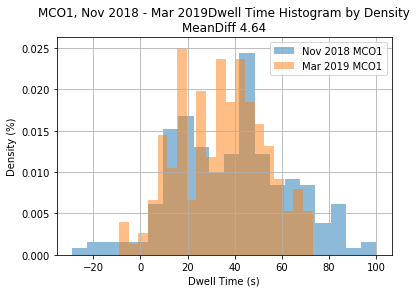

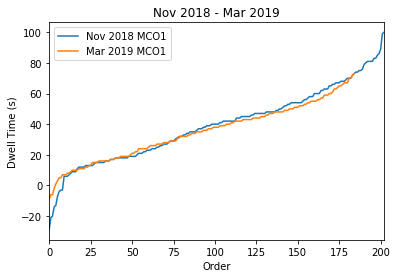


Platform Name MCO2
Dwell time selected by:
    Max waiting second 120
    Sample size 2000
=============== Statistics ===============
Apr dwell mean in (sec) 37.59154929577465
Nov dwell mean in (sec) 37.453271028037385
KS two-sample test pValue 0.6967171215853929
Dwell Time Decrease NOT Signficiant


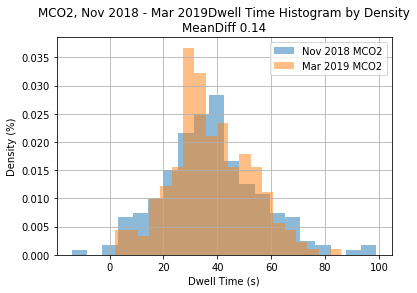

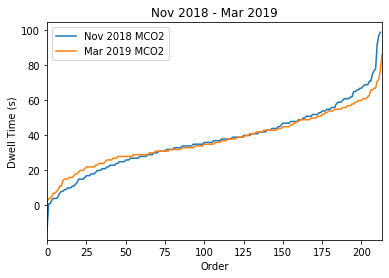


Platform Name SDT1
Dwell time selected by:
    Max waiting second 120
    Sample size 2000
=============== Statistics ===============
Apr dwell mean in (sec) 32.077669902912625
Nov dwell mean in (sec) 27.422459893048128
KS two-sample test pValue 0.40648494972232707
Dwell Time Decrease NOT Signficiant


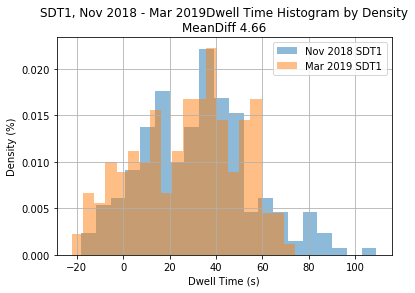

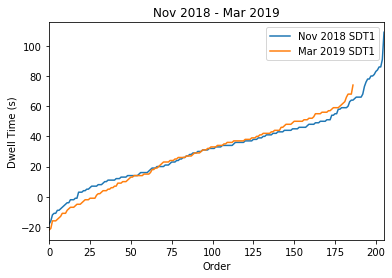


Platform Name SDT2
Dwell time selected by:
    Max waiting second 120
    Sample size 2000
=============== Statistics ===============
Apr dwell mean in (sec) 39.57276995305164
Nov dwell mean in (sec) 38.513888888888886
KS two-sample test pValue 0.15179653222481193
Dwell Time Decrease NOT Signficiant


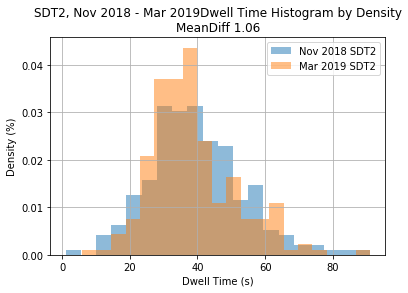

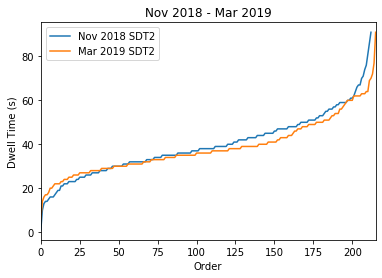


Platform Name SIT1
Dwell time selected by:
    Max waiting second 120
    Sample size 2000
=============== Statistics ===============
Apr dwell mean in (sec) 30.005555555555556
Nov dwell mean in (sec) 26.935672514619885
KS two-sample test pValue 0.24434302498447436
Dwell Time Decrease NOT Signficiant


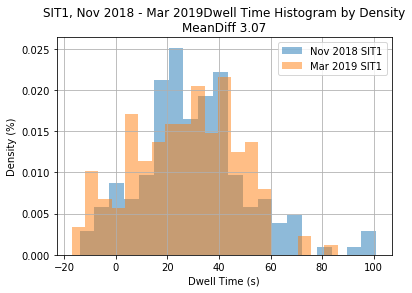

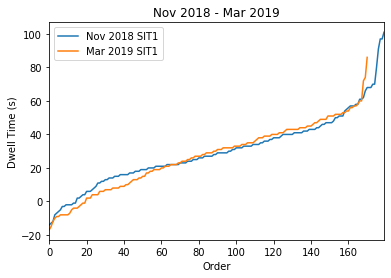


Platform Name SIT2
Dwell time selected by:
    Max waiting second 120
    Sample size 2000
=============== Statistics ===============
Apr dwell mean in (sec) 36.54883720930233
Nov dwell mean in (sec) 35.01851851851852
KS two-sample test pValue 0.03984638177288302
Dwell Time Decrease IS Signficiant


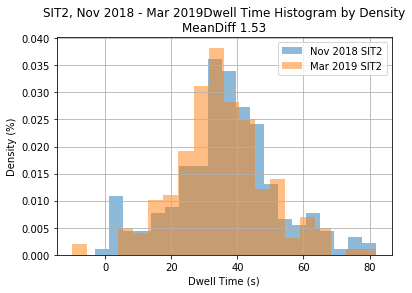

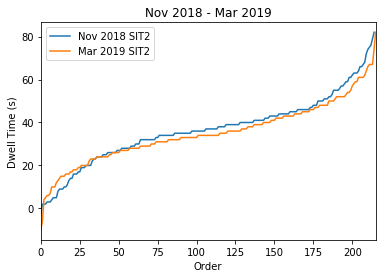


Platform Name WCI1
Dwell time selected by:
    Max waiting second 120
    Sample size 2000
=============== Statistics ===============
Apr dwell mean in (sec) 20.113636363636363
Nov dwell mean in (sec) 21.017241379310345
KS two-sample test pValue 0.2503433626413939
Dwell Time Increase NOT Signficiant


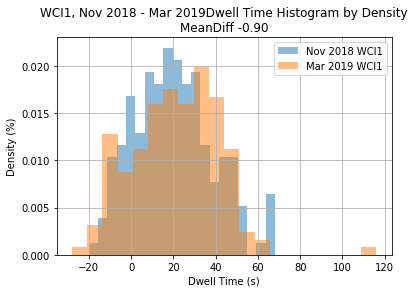

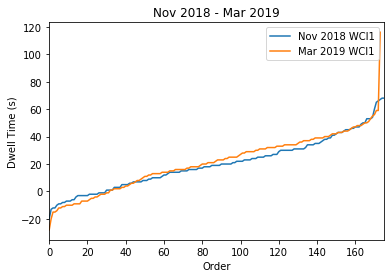


Platform Name WCI2
Dwell time selected by:
    Max waiting second 120
    Sample size 2000
=============== Statistics ===============
Apr dwell mean in (sec) 28.1924882629108
Nov dwell mean in (sec) 27.80184331797235
KS two-sample test pValue 0.2573062177460288
Dwell Time Decrease NOT Signficiant


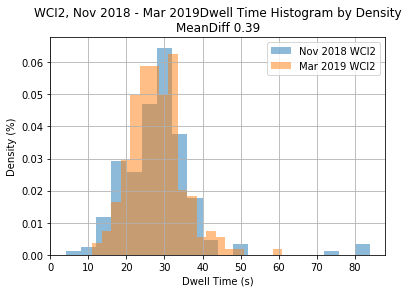

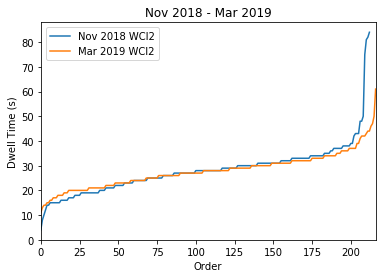



Num Significant Increase 2
Num Significant Decrease 2
Num Not Significant 8
==========Inc_Platform==========
['CWD1', 'CWD4']
==========Dec_Platform==========
['GQU1', 'SIT2']
==========Not_Platform==========
['GQU2', 'MCO1', 'MCO2', 'SDT1', 'SDT2', 'SIT1', 'WCI1', 'WCI2']


In [11]:
# ===== Nov2018 VS. Mar2019 ===== #
ledgen1 = 'Nov 2018'
ledgen2 = 'Mar 2019'
data1 = pd.read_csv('Data/2018-11.csv')
data2 = pd.read_csv('Data/Dart/Dart_Mar.csv')

data1, data2 = data_preprocessing(data1, data2)
perform_analysis(data1, data2)

# ===== Sep2018 VS. Mar2019 ===== #

/data/anjliu/venv_kaggle_nfl/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (88,89) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)



Platform Name CWD1
Dwell time selected by:
    Max waiting second 120
    Sample size 2000
=============== Statistics ===============
Apr dwell mean in (sec) 35.9969512195122
Nov dwell mean in (sec) 43.412393162393165
KS two-sample test pValue 6.661338147750939e-16
Dwell Time Increase IS Signficiant


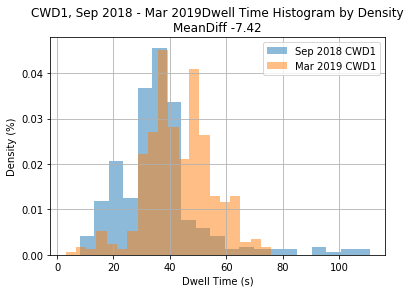

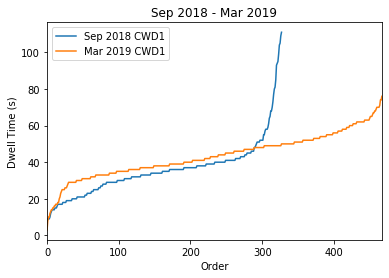


Platform Name CWD4
Dwell time selected by:
    Max waiting second 120
    Sample size 2000
=============== Statistics ===============
Apr dwell mean in (sec) 42.75085324232082
Nov dwell mean in (sec) 42.97773654916512
KS two-sample test pValue 0.5216472070524364
Dwell Time Increase NOT Signficiant


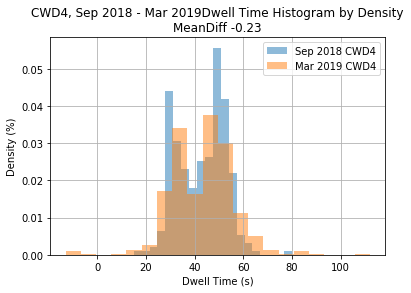

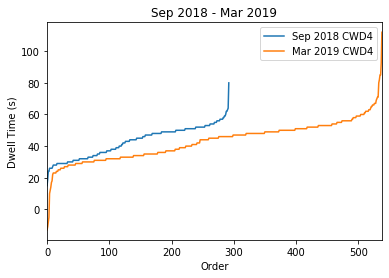


Platform Name GQU1
Dwell time selected by:
    Max waiting second 120
    Sample size 2000
=============== Statistics ===============
Apr dwell mean in (sec) 43.83257918552036
Nov dwell mean in (sec) 38.66847826086956
KS two-sample test pValue 0.06463675616757103
Dwell Time Decrease NOT Signficiant


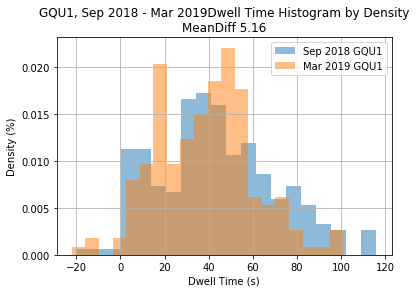

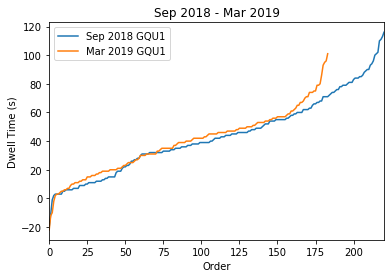


Platform Name GQU2
Dwell time selected by:
    Max waiting second 120
    Sample size 2000
=============== Statistics ===============
Apr dwell mean in (sec) 29.892045454545453
Nov dwell mean in (sec) 33.33673469387755
KS two-sample test pValue 0.018514597638738972
Dwell Time Increase IS Signficiant


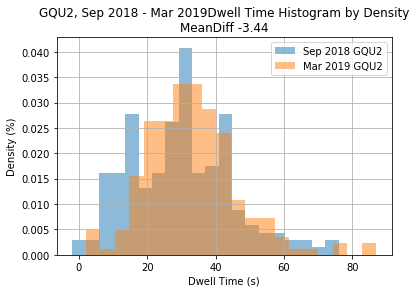

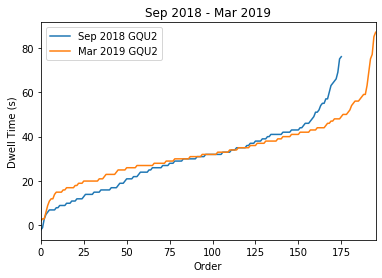


Platform Name MCO1
Dwell time selected by:
    Max waiting second 120
    Sample size 2000
=============== Statistics ===============
Apr dwell mean in (sec) 42.64253393665158
Nov dwell mean in (sec) 34.464864864864865
KS two-sample test pValue 0.003259243121832678
Dwell Time Decrease IS Signficiant


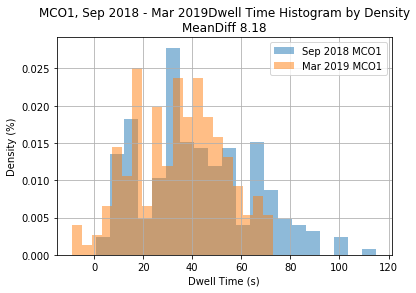

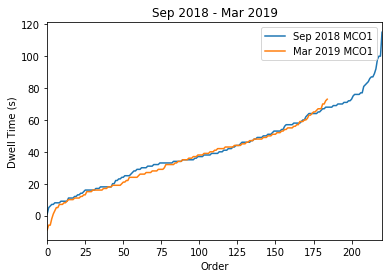


Platform Name MCO2
Dwell time selected by:
    Max waiting second 120
    Sample size 2000
=============== Statistics ===============
Apr dwell mean in (sec) 34.52820512820513
Nov dwell mean in (sec) 37.453271028037385
KS two-sample test pValue 0.009886573445682112
Dwell Time Increase IS Signficiant


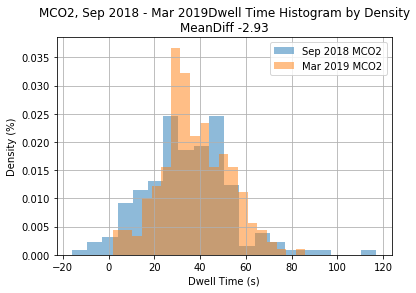

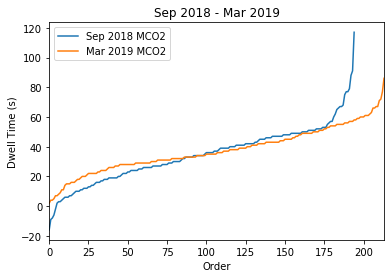


Platform Name SDT1
Dwell time selected by:
    Max waiting second 120
    Sample size 2000
=============== Statistics ===============
Apr dwell mean in (sec) 36.31390134529148
Nov dwell mean in (sec) 27.422459893048128
KS two-sample test pValue 0.03222576611069328
Dwell Time Decrease IS Signficiant


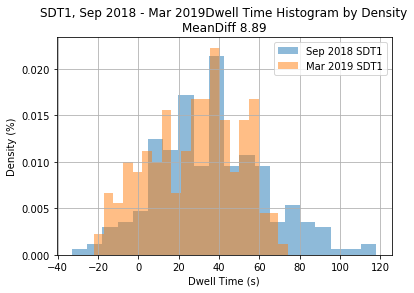

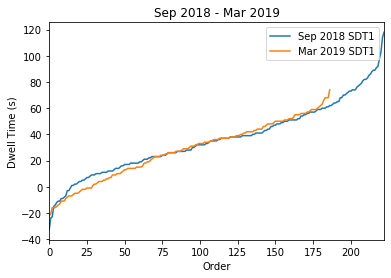


Platform Name SDT2
Dwell time selected by:
    Max waiting second 120
    Sample size 2000
=============== Statistics ===============
Apr dwell mean in (sec) 38.3756345177665
Nov dwell mean in (sec) 38.513888888888886
KS two-sample test pValue 0.0773371601754328
Dwell Time Increase NOT Signficiant


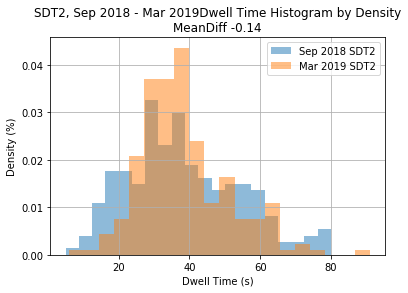

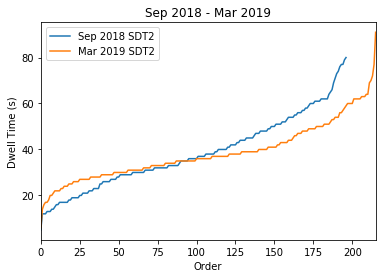


Platform Name SIT1
Dwell time selected by:
    Max waiting second 120
    Sample size 2000
=============== Statistics ===============
Apr dwell mean in (sec) 33.40196078431372
Nov dwell mean in (sec) 26.935672514619885
KS two-sample test pValue 0.0726566817534493
Dwell Time Decrease NOT Signficiant


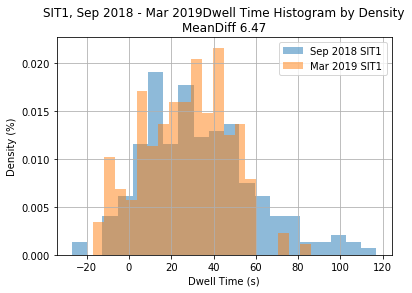

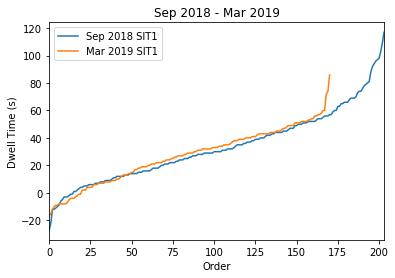


Platform Name SIT2
Dwell time selected by:
    Max waiting second 120
    Sample size 2000
=============== Statistics ===============
Apr dwell mean in (sec) 35.871134020618555
Nov dwell mean in (sec) 35.01851851851852
KS two-sample test pValue 0.19327821257323163
Dwell Time Decrease NOT Signficiant


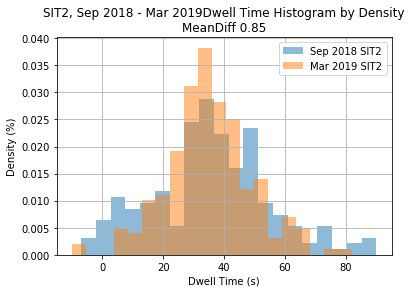

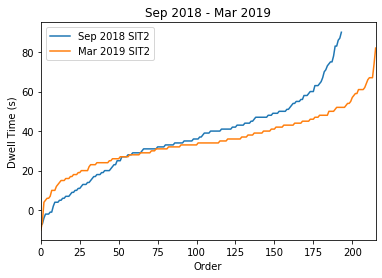


Platform Name WCI1
Dwell time selected by:
    Max waiting second 120
    Sample size 2000
=============== Statistics ===============
Apr dwell mean in (sec) 19.00515463917526
Nov dwell mean in (sec) 21.017241379310345
KS two-sample test pValue 0.08420836775338403
Dwell Time Increase NOT Signficiant


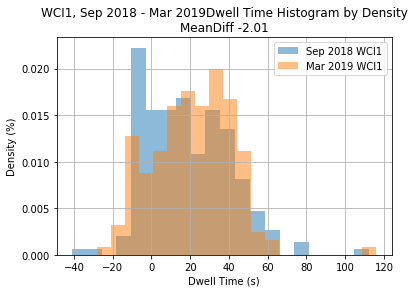

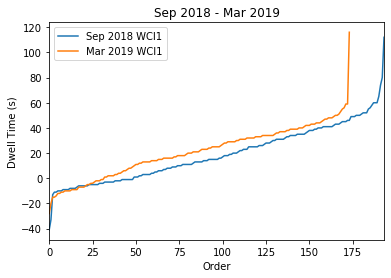


Platform Name WCI2
Dwell time selected by:
    Max waiting second 120
    Sample size 2000
=============== Statistics ===============
Apr dwell mean in (sec) 30.15897435897436
Nov dwell mean in (sec) 27.80184331797235
KS two-sample test pValue 0.05371917070657972
Dwell Time Decrease NOT Signficiant


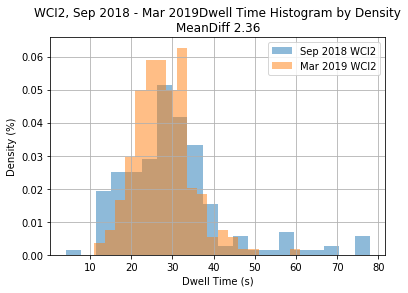

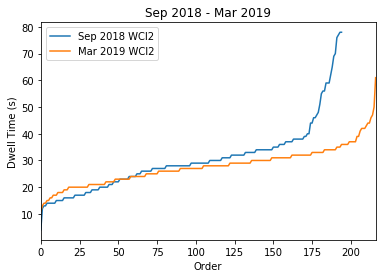



Num Significant Increase 3
Num Significant Decrease 2
Num Not Significant 7
==========Inc_Platform==========
['CWD1', 'GQU2', 'MCO2']
==========Dec_Platform==========
['MCO1', 'SDT1']
==========Not_Platform==========
['CWD4', 'GQU1', 'SDT2', 'SIT1', 'SIT2', 'WCI1', 'WCI2']


In [12]:
# ===== Sep2018 VS. Mar2019 ===== #
ledgen1 = 'Sep 2018'
ledgen2 = 'Mar 2019'
data1 = pd.read_csv('Data/2018-09.csv')
data2 = pd.read_csv('Data/Dart/Dart_Mar.csv')

data1, data2 = data_preprocessing(data1, data2)
perform_analysis(data1, data2)

# ===== Nov2018 VS. Nov2019 =====

/data/anjliu/venv_kaggle_nfl/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (88,89) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)



Platform Name CWD1
Dwell time selected by:
    Max waiting second 120
    Sample size 2000
=============== Statistics ===============
Apr dwell mean in (sec) 38.647702407002186
Nov dwell mean in (sec) 47.58715596330275
KS two-sample test pValue 3.114465847405681e-44
Dwell Time Increase IS Signficiant


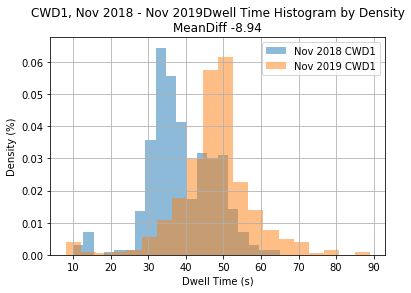

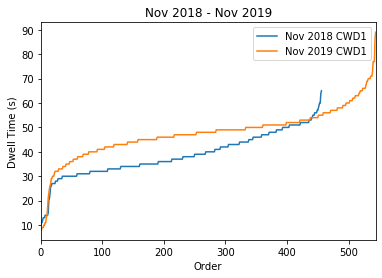


Platform Name CWD4
Dwell time selected by:
    Max waiting second 120
    Sample size 2000
=============== Statistics ===============
Apr dwell mean in (sec) 40.046601941747575
Nov dwell mean in (sec) 30.196392785571142
KS two-sample test pValue 1.2426678346501654e-33
Dwell Time Decrease IS Signficiant


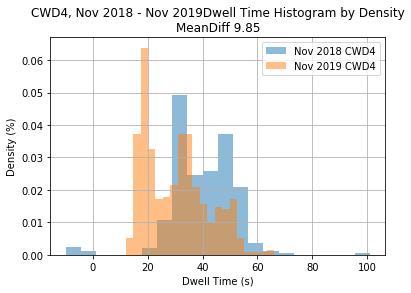

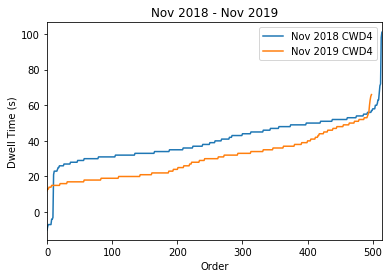


Platform Name GQU1
Dwell time selected by:
    Max waiting second 120
    Sample size 2000
=============== Statistics ===============
Apr dwell mean in (sec) 45.61576354679803
Nov dwell mean in (sec) 40.129411764705885
KS two-sample test pValue 0.08659068982936546
Dwell Time Decrease NOT Signficiant


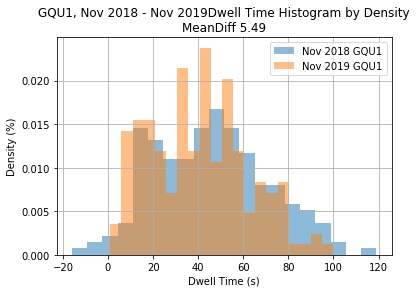

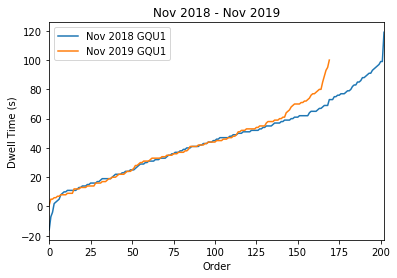


Platform Name GQU2
Dwell time selected by:
    Max waiting second 120
    Sample size 2000
=============== Statistics ===============
Apr dwell mean in (sec) 32.46031746031746
Nov dwell mean in (sec) 32.35028248587571
KS two-sample test pValue 0.6812094633031656
Dwell Time Decrease NOT Signficiant


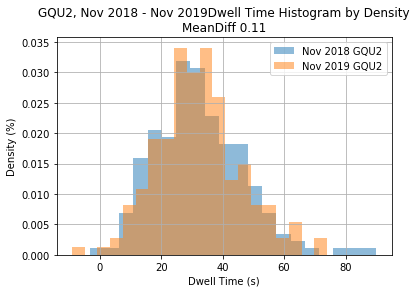

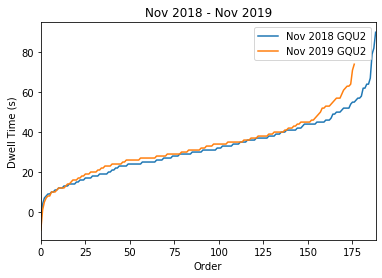


Platform Name MCO1
Dwell time selected by:
    Max waiting second 120
    Sample size 2000
=============== Statistics ===============
Apr dwell mean in (sec) 39.10344827586207
Nov dwell mean in (sec) 35.97093023255814
KS two-sample test pValue 0.2939166029747897
Dwell Time Decrease NOT Signficiant


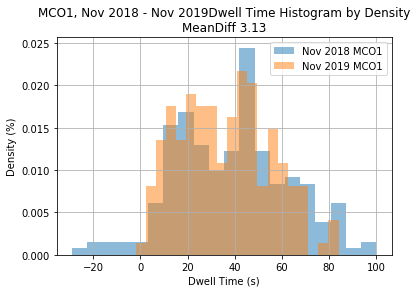

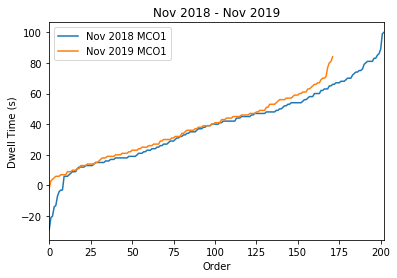


Platform Name MCO2
Dwell time selected by:
    Max waiting second 120
    Sample size 2000
=============== Statistics ===============
Apr dwell mean in (sec) 37.59154929577465
Nov dwell mean in (sec) 36.67661691542288
KS two-sample test pValue 0.7105954081404378
Dwell Time Decrease NOT Signficiant


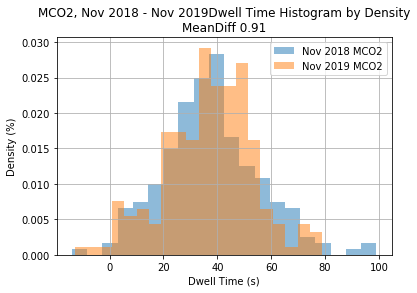

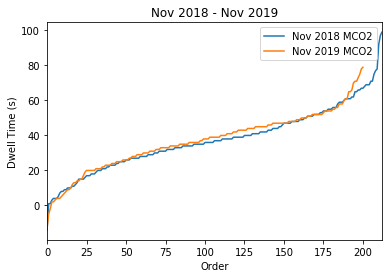


Platform Name SDT1
Dwell time selected by:
    Max waiting second 120
    Sample size 2000
=============== Statistics ===============
Apr dwell mean in (sec) 32.077669902912625
Nov dwell mean in (sec) 25.55056179775281
KS two-sample test pValue 0.08023407805140437
Dwell Time Decrease NOT Signficiant


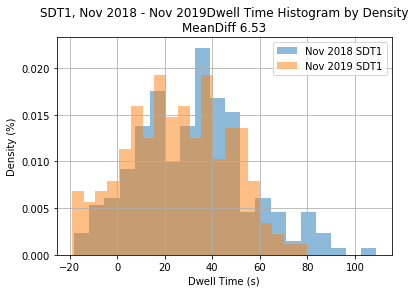

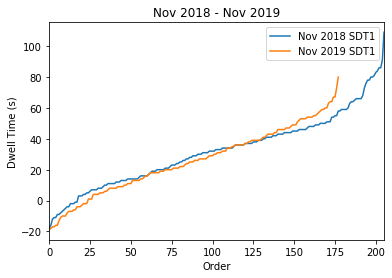


Platform Name SDT2
Dwell time selected by:
    Max waiting second 120
    Sample size 2000
=============== Statistics ===============
Apr dwell mean in (sec) 39.57276995305164
Nov dwell mean in (sec) 38.91542288557214
KS two-sample test pValue 0.40337311744985105
Dwell Time Decrease NOT Signficiant


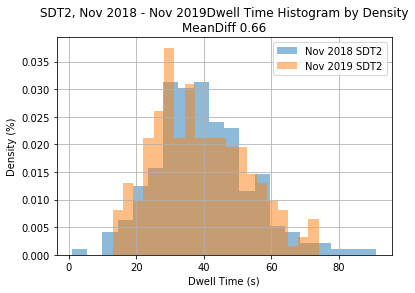

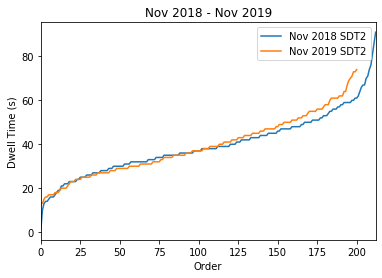


Platform Name SIT1
Dwell time selected by:
    Max waiting second 120
    Sample size 2000
=============== Statistics ===============
Apr dwell mean in (sec) 30.005555555555556
Nov dwell mean in (sec) 24.170886075949365
KS two-sample test pValue 0.007980074767940715
Dwell Time Decrease IS Signficiant


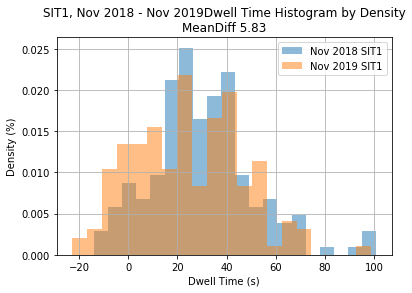

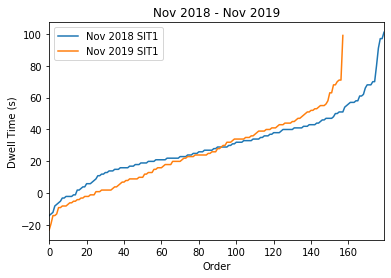


Platform Name SIT2
Dwell time selected by:
    Max waiting second 120
    Sample size 2000
=============== Statistics ===============
Apr dwell mean in (sec) 36.54883720930233
Nov dwell mean in (sec) 32.5771144278607
KS two-sample test pValue 0.055651944925784624
Dwell Time Decrease NOT Signficiant


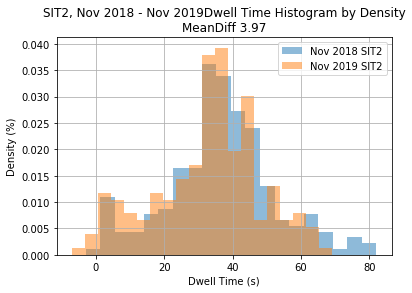

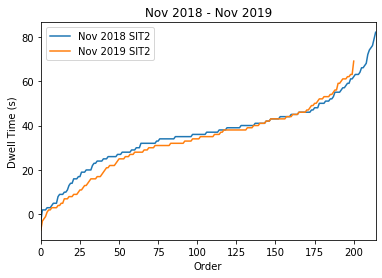


Platform Name WCI1
Dwell time selected by:
    Max waiting second 120
    Sample size 2000
=============== Statistics ===============
Apr dwell mean in (sec) 20.113636363636363
Nov dwell mean in (sec) 17.32191780821918
KS two-sample test pValue 0.01276916523840066
Dwell Time Decrease IS Signficiant


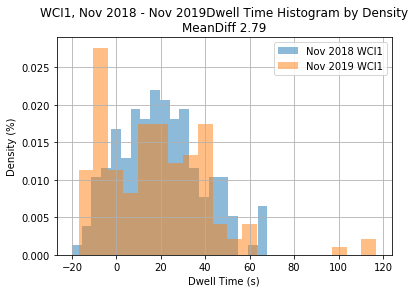

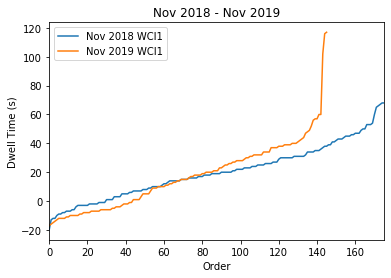


Platform Name WCI2
Dwell time selected by:
    Max waiting second 120
    Sample size 2000
=============== Statistics ===============
Apr dwell mean in (sec) 28.1924882629108
Nov dwell mean in (sec) 28.260204081632654
KS two-sample test pValue 0.8179301515938047
Dwell Time Increase NOT Signficiant


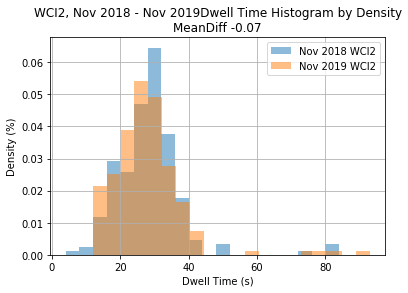

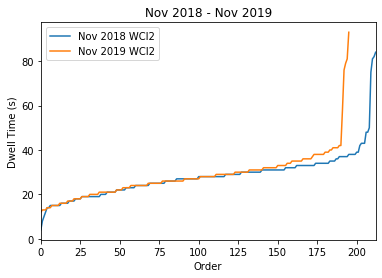



Num Significant Increase 1
Num Significant Decrease 3
Num Not Significant 8
==========Inc_Platform==========
['CWD1']
==========Dec_Platform==========
['CWD4', 'SIT1', 'WCI1']
==========Not_Platform==========
['GQU1', 'GQU2', 'MCO1', 'MCO2', 'SDT1', 'SDT2', 'SIT2', 'WCI2']


In [13]:
# ===== Nov2018 VS. Nov2019 ===== #
ledgen1 = 'Nov 2018'
ledgen2 = 'Nov 2019'
data1 = pd.read_csv('Data/2018-11.csv')
data2 = pd.read_csv('Data/Dart/Dart_Nov.csv')

data1, data2 = data_preprocessing(data1, data2)
perform_analysis(data1, data2)